`Classification` (phân loại) trong machine learning là xây dựng mô hình dự đoán một đối tượng nào đó trong danh sách các đối tượng đã biết trước. 

Ví dụ : 
* Dự đoán một người có bị bệnh tim mạch hay không dựa trên các chỉ số sức khỏe. Mô hình dự đoán này chỉ gồm 2 option là `có` hoặc `không` nên còn được gọi là mô hình nhị phân 2 class (binary class)
* Dự đoán một đối tượng trong ảnh là thức ăn, con người hay đồ vật... Mô hình dự đoán gồm 3 options trở lên còn được gọi là phân loại nhiều class `multi-class classification`/
* Dự đoán giống chó trong một bức hình chụp một một hoặc nhiều giống chó... Mô hình dự đoán được gọi là `multi-label classification` vì nó phân loại những giống chó khác nhau trong một thực thể  gọi chung là chó.

Nội dung chính mà bài viết sẽ lược qua như sau : 

1. Kiến trúc của mô hình phân loại (Classification model)
2. Tạo dữ liệu mẫu và quan sát 
3. Kích thước dữ liệu nhập/ xuất (input shapes and output shapes)
    * `X`: Biến giải thích, cung cấp thông tin mô tả đối tượng trong dữ liệu (input)
    * `y`: Biến phụ thuộc, là giá trị cho thấy đối tượng đó thuộc loại nào (label/ output)
4. Các bước xây dựng mô hình 2 class (binary class) và nhiều class 
    * Khởi Tạo mô hình    
    * Compile mô hình
        * Định nghĩa loss function
        * Thiết lập optimizer
            * Tìm kiếm learning_rate tốt nhất
        * Tạo evaluation metrics        
    * Fit mô hình (Bắt đầu train mô hình và tìm kiếm mô hình phù hợp cho dữ liệu)    
    * Cải thiện mô hình
    
5. Tìm hiểu sức mạnh của mô hình phi tuyến tính

6. Đánh giá mô hình phân loại 
    * Quan sát mô hình trên đồ thị
    * Quan sát độ chính xác và độ sai sót của train, valid.
    * So sánh giá trị dự đoán với giá trị thực tế

7. Thử nghiệm với tập dữ liệu lơn hơn (Fashion-MNIST)
8. Kết luận


## 1. Kiến trúc của mô hình phân loại (Classification model)

Kiến trúc của mô hình phân loại trong neural network rất đa dạng tùy thuộc vào vấn đề cần giải quyết. Tuy nhiên, trong những kiến trúc đó, chúng có điểm tương đồng cơ bản như sau : 

+ Một Input layer
+ Một vài hidden layer
+ Một output layer

Phần lớn khác nhau còn lại tùy thuốc vào nhà phân tích dữ liệu tạo ra mô hình.

Dưới đây là một số tiêu chuẩn mà bạn sẽ thường sử dụng cho mô hình phân loại trong neural network.

|Hyperparameter | Phân loại 2 class (binary class) | Phân loại nhiều class (multi-class)|
|---------------|----------------------------------|------------------------------------|
|Input layer shape| Có cùng số biến giải thích (VD : Dự đoán bệnh nhân có bị tim mạch hay không dựa trên 5 đặc tính `độ tuổi`, `giới tính`, `chiều cao`, `cân nặng`, `môi trường sống`) | Giống với binary class |
|Hidden layers | Điều chỉnh tùy thuộc vào vấn đề, min=1, max= vô hạn|  Giống với binary class | 
|Neurons trên hidden layer| Điều chỉnh tùy thuôc vào vấn đề, Thường từ 10 đến 100 | Giống với binary class |
|Output layer shape| 1 ( vì chỉ có 2 class nên chỉ có thể là class này hoặc class kia) | Dựa vào số class (VD : 3 cho `food`, `dog`, `photo`)
|Hidden activation| Thường là [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Giống với binary class |
|Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
|Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) trong TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) trong TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Giống với binary class |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*


## 2. Tạo dữ liệu mẫu và quan sát

Chúng ta có thể bắt đầu bằng cách nhập tập dữ liệu phân loại nhưng hãy thực hành tạo một số dữ liệu phân loại của riêng mình

Vì mô hình phân loại được xây dựng để dự đoán một đối tượng nào đó là cái này hoặc cái kia nên chúng ta hãy tạo một số dữ liệu phù  hợp để phản ánh điều đó.

Để làm được điều này, chúng ta sẽ sử dụng hàm trong Scikit-Learn's [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles).

In [1]:
from sklearn.datasets import make_circles

# Tạo 5000 mẫu
n_samples = 5000 

X,y = make_circles(n_samples,noise=0.02,random_state=42)

In [2]:
X[:5]

array([[-0.76928899, -0.57253359],
       [ 0.78695815,  0.14302339],
       [ 0.74562001,  0.3043983 ],
       [-0.88626403,  0.48336329],
       [-0.17727187,  0.96348697]])

In [3]:
y[:5]

array([0, 1, 1, 0, 0])

Chúng ta đã thấy 5 phần tử đầu tiên của `X` và `y`. Nhưng nó chỉ là những ma trận nên rất khó để quan sát trực quan. Do đó 

> Một điều quan trọng khi bắt đầu thực hiện các dự án machine learning là chúng ta cần [thích nghi](https://karpathy.github.io/2019/04/25/recipe/) với mô hình. Và một trong những cách tốt nhất để có được điều đó là quan sát dữ liệu bằng cách tạo đồ thị càng nhiều càng tốt.

In [4]:
import pandas as pd

In [5]:
circles = pd.DataFrame({"X1" : X[:,0], "X2" : X[:,1], "label" : y})
circles

,X1,X2,label
0,-0.769289,-0.572534,0
1,0.786958,0.143023,1
2,0.745620,0.304398,1
3,-0.886264,0.483363,0
4,-0.177272,0.963487,0
...,...,...,...
4995,0.145017,-0.774420,1
4996,0.394382,0.931287,0
4997,0.081141,0.830959,1
4998,-0.775292,-0.033927,1


Số lượng các label đang làm việc

In [6]:
circles.label.value_counts()

1    2500
0    2500
Name: label, dtype: int64

`circles` có 2 label là `0` và `1`, mỗi label đều có 2500 giá trị -> Đây là mô hình **2 class (binary class)**

Nếu như có nhiều hơn 2 labels (chẳng hạn 0,1,2,3,4...) thì đó là mô hình **nhiều class**



In [7]:
import matplotlib.pyplot as plt

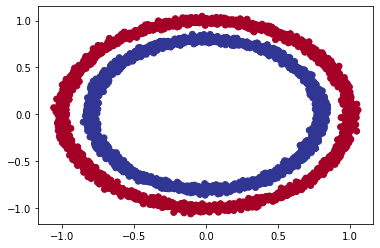

In [8]:
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

Từ đồ thì, chắc hẳn bạn đã đoán được chúng ta sắp xây dựng mô hình nào rồi đúng không ?

Làm thế nào về việc chúng ta có thể  một mô hình để phân loại các chấm màu xanh với chấm đỏ? Như trong mô hình có thể phân biệt màu xanh lam với các chấm màu đỏ.

> 🛠 **Luyện tập:**  Trước khi tiến hành những bước tiếp theo, bạn có thể dành 10 phút để trải nghiệm [Tensorflow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true).  Thử chỉnh các hyperparameter khác nhau mà bạn nhìn thấy và cloci vào nút Play để xem các đường neural.

## 3. Kích thước dữ liệu nhập/ xuất (input shapes and output shapes)

Một trong những vấn đề thường gặp nhất khi bạn tiến hành chạy mô hình neural network là kích thước (shape) không phù hợp. Cụ thể hơn là kích thước của dữ liệu nhập và xuất. Trong trường hợp này là chúng ta muốn input `X` và tạo mô hình để dự đoán `y`. Chúng ta sẽ cùng kiểm tra kích thước của 2 biến này.

In [9]:
X.shape, y.shape

((5000, 2), (5000,))

- `X` : 1000 dòng, 2 cột
- `y` : 1000 dòng

Chúng ta sẽ kiểm tra phần tử đầu tiên của `X` và `y`

In [10]:
X[0], y[0]

(array([-0.76928899, -0.57253359]), 0)

Vậy là chúng ta có 2 thuộc tính của `X` để giải thích cho giá trị của `y`.

Điều này có nghĩa là kích thước đầu vào neural network của chúng ta sẽ phải chấp nhận một tensor với ít nhất một chiều là hai thuộc tính và trả về một tensor có ít nhất một giá trị

> **Lưu ý: ** `y` có kích thước (1000,) có thể gây nhầm lẫn. Tuy nhiên, điều này là vì tất cả các giá trị của `y` thực sự là giá trị đơn (scalar) và do đó, chúng không có chiều. Từ giờ đây, khi nghĩ đến kích thước của giá trị xuất thì ít nhất nó cũng phải có cùng kích thước như của `y` ( trong trường hợp này, giá trị xuất ra từ neural network phải có ít nhất  1 giá trị )

## 4. Các bước xây dựng mô hình 2 class (binary class) và nhiều class

Bây giờ chúng ta đã có dữ liệu gì cũng như kích thước đầu vào và đầu ra. Điều tiếp theo là xây dựng mô hình dự đoán. 

Trong Tensorflow, có 3 bước cơ bản để xây dựng mô hình : 

1. **Tạo mô hình (Creating model)** : Nối các layers trong neural network lại với nhau ( sử dụng [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) hoặc import  mô hình đã được train trước đó (transfer learning)
2. **Compile mô hình (Compile model):** Định nghĩa hiệu suất mà mô hình nên đo lường (loss/metrics) cũng như làm như thế nào để cải thiện mô hình đó (optimizer)
3. **Fit mô hình:**  Mô hình cố gắng tìm kiếm các khuôn mẫu (các điểm tương đồng hoặc có mối liên hệ) trong dữ liệu (hay nói khác là làm như thế nào để biến các đặc tính `X` thành `y`)

In [11]:
# Import libraries
import tensorflow  as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### model_1

In [12]:
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(Dense(1))

model_1.compile(
    loss="binary_crossentropy",
    optimizer="sgd", 
    metrics=["accuracy"]
)

model_1.fit(X,y, epochs=5)

Epoch 1/5
157/157 [==============================] - 3s 3ms/step - loss: 1.1427 - accuracy: 0.4876
Epoch 2/5
157/157 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4934
Epoch 3/5
157/157 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4884
Epoch 4/5
157/157 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5036
Epoch 5/5
157/157 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4934


Từ kết quả trên, ta thấy được độ chính xác, độ sai sót của mỗi epoch trong quá trình train. Mô hình thực hiện có vẻ không tốt (độ chính xác < 50%). Nhưng nếu train lâu hơn, mô hình có cải thiện không ? 

In [13]:
model_1.fit(X,y, epochs=100,verbose=0)
model_1.evaluate(X,y)

157/157 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6935116052627563, 0.5]

### model_2 

Dù đã tăng số lần train lên 100 nhưng độ chính xác của mô hình vẫn không tăng được nhiều. Vậy nếu như tăng số layer trong mô hình, liệu nó có cải thiên không ?

In [14]:
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(Dense(1))
model_2.add(Dense(1))
model_2.add(Dense(1))

model_2.compile(
    loss="binary_crossentropy",
    optimizer="sgd", 
    metrics=["accuracy"]
)

model_2.fit(X,y, epochs=5, verbose=0)

In [15]:
model_2.evaluate(X,y)

157/157 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4880


[0.6937965750694275, 0.4880000054836273]

Oh! Vẫn không cải thiện được (chính xác chỉ ~50% )

Làm thế nào để cải thiện mô hình? Ở những bài trước đã có giới thiệu cho bạn những cách cải thiện mô hình được sử dụng rất phổ biến như sau: 

- Thêm layer để mô hình học được sâu hơn ( Đôi khi học quá sâu dẫn đến tác dụng phụ làm mô hình kém hiệu quả hơn )
- Tăng thêm số units (neurons) trong mỗi layer
- Thay đổi activation function
- Thay đổi optimization function (`sgd`, `adam` ...)
- Thay đổi learning rate 
- Tăng thêm dữ liệu train
- Train mô hình lâu hơn


![Improve model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)


### model_3 (Cải thiện mô hình)

In [16]:
tf.random.set_seed(42)

model_3 = Sequential()
model_3.add(Dense(10))
model_3.add(Dense(10))
model_3.add(Dense(1))

model_3.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_3.fit(X,y,epochs=100,verbose=0)


In [17]:
model_3.evaluate(X,y)

157/157 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5444


[0.6933817267417908, 0.5443999767303467]

Độ chính xác trong dự đoán của mô hình vẫn không được cải thiện. Vẽ đồ thị để quan sát xem có vấn đề gì với mô hình này.

> 🔑 **Lưu ý:** Bất cứ khi nào mô hình của bạn hoạt động bất thường hoặc có điều gì đó xảy ra đối với dữ liệu khiến chúng hoạt động không đúng như mong muốn, bạn hãy vẽ biểu đồ để quan sát chúng để kiểm tra dữ liệu của bạn, kiểm tra mô hình của bạn xem chúng được đưa vào các dự đoán của mô hình của bạn như thế nào.

Để quan sát mô hình dự đoán, chúng ta sẽ tạo một hàm vẽ biểu đồ có tên `plot_decision_boundary()` với: 
- Lấy trong  mô hình train các đặc tính `X` và label `y`
- Tạo [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) cho các đặc tính `X` khác nhau
- Đưa ra dự đoán thông qua `meshgrid`.
- Vẽ đồ thị dự đoán cũng như các đường thẳng giữa các vùng khác nhau ( nơi chứa các class riêng biệt)

Nghe có vẻ hơi khó hiểu, nhưng không sao bạn cứ xem những dòng code dưới đây sẽ trực quan hơn.

> 🔑 **Lưu ý** : Nếu như bạn không chắc chắn về những gì mô tả trong hàm, bạn hãy thử nó riêng lẻ để xem ý nghĩa của nó như thế nào, rồi sau đó hãy ghép nó vào trong hàm.

### Tạo hàm vẽ đồ thị của mô hình dự đoán 

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def plot_decision_boundary(model, X,y) : 
    """
    Vẽ decision boundary được tạo bởi mô hình dự đoán trên đặc tính `X`, 
    Hàm này được phỏng theo từ nguồn : 
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Định nghĩa giá trị giới hạn trục x và y
    x_min, x_max = X[:,0].min(), X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min(), X[:,1].max() + 0.1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,101), np.linspace(y_min, y_max,101))
    # Tạo X dựa trên các giá trị xx,yy
    x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
    # Thực hiện dự đoán mô hình train
    pred = model.predict(x_in)
    
    if len(pred[0]) > 1 : 
        print("Đang làm việc với mô hình phân loại nhiều lớp")
        return 
    else : 
        print("Đang làm việc với mô hình phân loại 2 lớp")
        pred = np.round(pred).reshape(xx.shape)
    plt.contourf(xx,yy,pred, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu,s=25, edgecolors="k")
    plt.xlim([x_min,x_max])
    plt.ylim([y_min,y_max])

Đang làm việc với mô hình phân loại 2 lớp


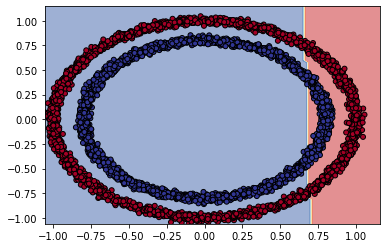

In [20]:
    plot_decision_boundary(model_3, X,y)

### model_3 ( mô hình hồi quy)

Đồ thị trông có vẻ đang vẽ một đường thẳng đi qua dữ liệu. Nhưng mô hình hiện tại của chúng ta không phải là mô hình hồi quy tuyến tính. Nếu đây là mô hình tuyến tính, có thể nó sẽ hoạt động tốt, cùng thử xem : 

In [21]:
X_reg = np.arange(0,800,5)
y_reg = np.arange(100,900,5)

X_reg_len = len(X_reg)
y_reg_len = len(y_reg)

X_reg_train = X_reg[:int(0.8 * X_reg_len)]
y_reg_train = y_reg[:int(0.8 * y_reg_len)]

X_reg_test = X_reg[int(0.8 * X_reg_len):]
y_reg_test = y_reg[int(0.8 * y_reg_len):]

X_reg_train.shape, y_reg_train.shape, X_reg_test.shape, y_reg_test.shape

((128,), (128,), (32,), (32,))

Thử đưa dữ liệu vừa mới tạo vào `model_3`

In [22]:
model_3 = Sequential()
model_3.add(Dense(100))
model_3.add(Dense(10))
model_3.add(Dense(1))

model_3.compile(
    loss="mae",
    optimizer="adam",
    metrics=["mae"]
)

model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

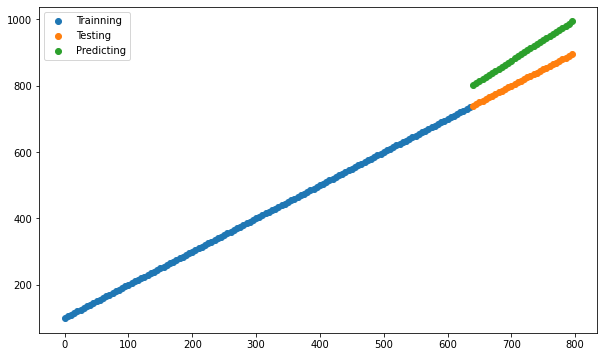

In [23]:
y_preds= model_3.predict(X_reg_test)
plt.figure(figsize=(10,6))
plt.scatter(X_reg_train, y_reg_train, label="Trainning")
plt.scatter(X_reg_test, y_reg_test, label="Testing")
plt.scatter(X_reg_test, y_preds, label="Predicting")
plt.legend()

Mô hình hồi quy trên dự đoán dù không hoàn hảo (mô hình hoàn hảo khi đường màu xanh trùng với đường màu cam) nhưng nó vẫn tốt hơn mô hình phân loại. Vì vậy, điều này đồng nghĩa với việc mô hình cần học thêm một vài thứ.

### model_4 (Mô hình phi tuyến tính)

Chúng ta đã thấy neural network có thể mô hình các các đường thằng với khả năng dự đoán tốt hơn như trên. Vậy nếu mô hình không theo đường thằng, liệu neural network có làm tốt không?

Nếu chúng ta thực hiện mô hình dữ liệu phân loại ( phân loại màu đỏ và xanh của `circles`), chúng ta sẽ cần một vài đường phi tuyến

> 🔨 **Thực hành:** Trước khi đi tiếp, bạn có thể trải nghiệm mô hình phân loại dữ liệu trong [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true), cố gắng thay đổi các hypeparameter tùy ý để xem sự khác biệt giữa giữa chúng.

Chúng tôi sẽ tái tạo neural network mà bạn có thể thấy tại liên kết này:

![simple neural net created with TensorFlow playground](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-simple-net-linear-activation.png)
*The neural network we're going to recreate with TensorFlow code. See it live at [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).*

Ý tưởng chính trong mô hình dưới đây là thêm `activation function` cho mô hình


In [24]:
tf.random.set_seed(42)

model_4 = Sequential()
model_4.add(Dense(100, activation=tf.keras.activations.linear))
model_4.add(Dense(1))

model_4.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_4.fit(X,y, epochs=100,verbose=0)

In [25]:
model_4.evaluate(X,y)

157/157 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5904


[0.6934056878089905, 0.590399980545044]

Đang làm việc với mô hình phân loại 2 lớp


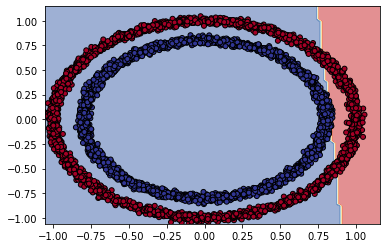

In [26]:
plot_decision_boundary(model_4, X,y)

Tỉ lệ dự đoán chính xác của mô hình chỉ ở mức ~50% , `linear activation function` tạo ra một đường thẳng trong dự đoán mô hình, vì `linear` được áp dụng cho các mô hình tuyến tính trong khi dữ liệu của chúng ta là phi tuyến. Vì vậy, chúng ta sẽ phải thay đổi activation function thành dạng phi tuyến đến mô hình. Và một trong số những activation phi tuyên được sử dụng rất phổ biến là [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning)

## 5. Tìm hiểu sức mạnh của mô hình phi tuyến tính

### model_5 (Thêm activation cho hidden layers của mô hình phi tuyến)

In [27]:
tf.random.set_seed(42)

model_5 = Sequential()
model_5.add(Dense(5, activation="relu"))
model_5.add(Dense(5, activation="relu"))
model_5.add(Dense(1))

model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history_5 = model_5.fit(X,y,epochs=100,verbose=0)

In [28]:
model_5.evaluate(X,y)

157/157 [==============================] - 0s 2ms/step - loss: 9.2574e-04 - accuracy: 1.0000


[0.0009257394704036415, 1.0]

Đang làm việc với mô hình phân loại 2 lớp


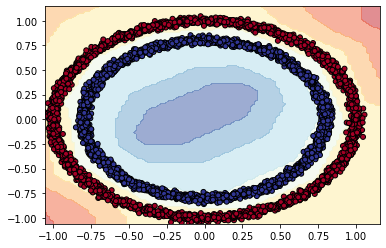

In [29]:
plot_decision_boundary(model_5, X,y)

### model_6 (thêm activation function cho output layer của mô hình phi tuyến)

Mô hình dự đoán đã được cải thiện rất đáng kể ~77% và chúng ta thấy được đồ thị đã không còn những đường thẳng nữa mà nó bắt đầu uốn theo hình dáng của dữ liệu. Đó mới chỉ là thay đổi `activation function` của các hidden layer, nếu ta thêm activation cho `output layer` thì liệu mô hình có cải thiện thêm không? 

Vì dữ liệu hiện tại chỉ là phân loại 2 class (binary class) nên `output layer` sẽ là  [Sigmoid activation function](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid).

In [30]:
tf.random.set_seed(42)

model_6 = Sequential()
model_6.add(Dense(5, activation=tf.keras.activations.relu))
model_6.add(Dense(5, activation=tf.keras.activations.relu))
model_6.add(Dense(1, activation=tf.keras.activations.sigmoid))

model_6.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_6.fit(X,y,epochs=100,verbose=0)

In [31]:
model_6.evaluate(X,y)

157/157 [==============================] - 0s 2ms/step - loss: 6.2854e-04 - accuracy: 1.0000


[0.0006285373819991946, 1.0]

Đang làm việc với mô hình phân loại 2 lớp


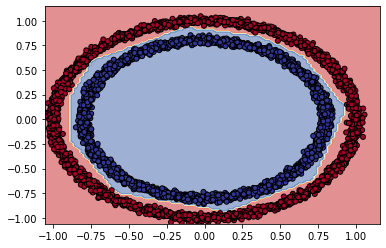

In [32]:
plot_decision_boundary(model_6,X,y)

In [33]:
loss , accuracy = model_6.evaluate(X,y)
print(f"Độ chính xác của mô hình : {accuracy*100:.2f}%")
print(f"Độ sai số của mô hình : {loss}")

157/157 [==============================] - 0s 2ms/step - loss: 6.2854e-04 - accuracy: 1.0000
Độ chính xác của mô hình : 100.00%
Độ sai số của mô hình : 0.0006285373819991946


Mô hình có vẻ hoàn hảo sau khi thêm `Signmoid activation function` vào `output layer`. Nó tách dữ liệu ra làm 2 miền rõ ràng. 

> 🤔 Nhưng liệu khi chúng ta dự đoán với những dữ liệu mà mô hình chưa được học thì nó có thực sự chính xác như vậy hay không? Nhớ rằng từ đầu bài viết đến giờ, chúng ta chưa hề tách dữ liệu thành `train` và `test` mà dùng toàn bộ dữ liệu để train mô hình. Khi đánh giá mô hình, những dữ liệu được đánh giá đều là những dữ liệu đã được học nên mô hình có thể nhận diện được ngay.

Trước khi trả lời cho câu hỏi trên, chúng ta cần nhận ra những gì mà chúng ta đã làm rằng :

> 🔑**Lưu ý:** Sự kết hợp giữa **hàm tuyến tính( đường thẳng) và phi tuyến tính( không là đường thẳng)** là một trong những nền tảng then chốt trong neural network

Có thể nghĩ như thế này : 

Nếu như bạn có vô số đường thẳng cũng như không phải là những đường thẳng, loại mô hình nào bạn có thể vẽ được ? 

Về cơ bản, những gì mà neural network làm là tìm kiếm những điểm đặc trưng của các đặc tính trong từng đối tượng trong dữ liệu (`pattern`) để xây dựng mô hình. Để có được một cái nhìn rõ hơn về các `activation function` mà chúng ta vừa sử dụng, hãy tạo chúng và sau đó thử chúng trên một số dữ liệu



### Cách thức hoạt động của các activation function

**`tf.keras.activation.linear`** 

Công thức: $f(x)=x$

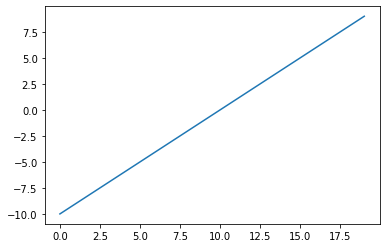

In [34]:
A = tf.cast(tf.range(-10,10), dtype=tf.float32)

plt.plot(A)

Tuyến tính là một đường thẳng.

**[`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid).** có công thức sau : 

Công thức : $f(x) = {\frac{1}{1+ e^{-x}}}$

In [35]:
def sigmoid(x) : 
    return 1/ (1 + tf.math.exp(-x))

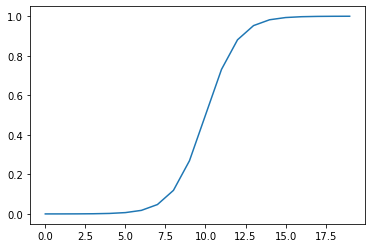

In [36]:
plt.plot(sigmoid(A))

**[`tf.keras.activations.relu`](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/#:~:text=The%20rectified%20linear%20activation%20function,otherwise%2C%20it%20will%20output%20zero.)**

In [37]:
def relu(x) : 
    return tf.maximum(0,x)


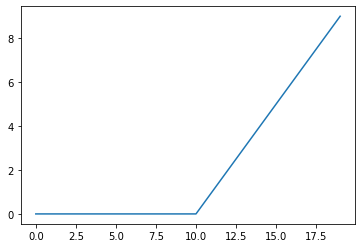

In [38]:
plt.plot(relu(A))

Kiểm tra xem hàm activation trong tf có trùng với công thức toán học hay không 

In [39]:
tf.keras.activations.linear(A) == A

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Rõ ràng khi mô hình không học được gì khi sử dụng `linear activation function` vì bản thân hàm này không thay đổi bất cứ dữ liệu gì. Trong khi đó, với hàm phi tuyến, tất cả dữ liệu đều được xử lý. Neural network sử dụng các phép biến đổi này ở quy mô lớn để tìm các `pattern` cho input và output.

Để có thể tìm hiểu sâu hơn về các vấn đề này, bạn có thể đọc thêm  [machine learning cheatsheet page](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#). Riêng đến đây là đủ, chúng ta sẽ tiếp tục xây dựng mô hình dự đoán.

## 6. Đánh giá mô hình phân loại 

Ta đã tiến hành đánh giá mô hình dựa trên dữ liệu đã được học, kết quả độ chính xác hoàn hảo 100%. Nhưng thực sự nó có hoàn hảo đến như vậy? Để đánh giá khách quan một mô hình có tốt hay không, ta cần cho nó nhận diện những gì mà nó chưa từng biết đến, còn những thứ đã học rồi, nó đã thuộc tất cả nên không thể cho rằng là tốt.

Do đó, trước khi đưa dữ liệu vào mô hình, ta cần tách dữ liệu ra làm 2 phần riêng biệt là `train` và `test`. Dữ liệu `train` sẽ là dữ liệu được đưa vào mô hình để nó học, còn dữ liệu `test` là những dữ liệu mà mô hình chưa hề biết trong quá trình học, sẽ được đưa vào để kiểm tra xem mô hình học như thế nào.

Thông thường dữ liệu `train` sẽ chiếm 70% - 80%, dữ liệu `test` từ 20% - 30%

### Tách dữ liệu thành `train` và `test` thủ công (không shuffle dữ liệu)

In [40]:
# Lấy 80% trong tổng số dữ liệu
train_len = int(0.8 * len(X))

X_train = X[:train_len]
y_train = y[:train_len]

X_test = X[train_len:]
y_test = y[train_len:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 2), (1000, 2), (4000,), (1000,))

OK, dữ liệu hiện tại đã được chia thành `train` và `test`, ta sẽ tiến hành xây dựng và đánh giá mô hình

### model_7 ( mô hình được chia thành train và test thủ công)

In [41]:
tf.random.set_seed(42)

model_7 = Sequential()
model_7.add(Dense(5,activation="relu"))
model_7.add(Dense(5,activation="relu"))
model_7.add(Dense(1,activation="sigmoid"))

model_7.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history_7 = model_7.fit(X_train, y_train, epochs=25, verbose=0)

Đang làm việc với mô hình phân loại 2 lớp


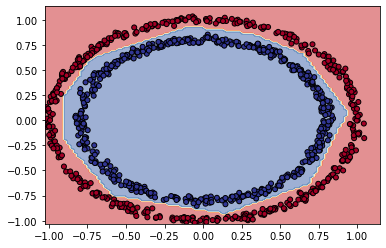

In [42]:
plot_decision_boundary(model_7, X_test, y_test)

In [43]:
loss , accuracy = model_7.evaluate(X_test,y_test)
print(f"Độ chính xác của mô hình : {accuracy*100:.2f}%")
print(f"Độ sai số của mô hình : {loss}")

32/32 [==============================] - 0s 3ms/step - loss: 5.3141e-04 - accuracy: 1.0000
Độ chính xác của mô hình : 100.00%
Độ sai số của mô hình : 0.0005314053851179779


wow! độ chính xác 100%! 

Có thể thấy độ chính xác giữa `model_6` và `model_7` đều là 100%, vậy 2 mô hình này có gì khác nhau? 

- `activation` : Sử dụng `sigmoid` và `relu` thay vì sử dụng dường dẫn đến thư viện như `tf.keras.activations.relu`. Trong Tensorflow, cả 2 đều được hiểu như nhau
- `learning_rate` : Nếu như không có gì thì giá trị mặc định của `learning_rate` trong `optimizer` là **0.001**. Nếu `learning_rate` càng lớn thì  tốc độ học của mô hình càng nhanh. Tuy nhiên, cũng giống như con người, khi mô hình học nhanh quá mức sẽ dẫn đến việc nó không tiếp thu được thứ gì cả. Do đó, ở những mô hình sau sẽ có một số mẹo để tìm `learning_rate` tốt nhất.
- Số lượng `epochs` : Ở `model_7` số epocsh chỉ còn 25 so với 100 trong `model_6` nhưng nó vẫn tạo ra kết quả dự đoán đáng kinh ngạc ở cả tập dữ liệu `train` và `test`. Một lý do khiến cho mô hình này thực hiện tốt mặc dù số `epochs` thấp hơn là vì chúng ta đã tăng tỉ lệ `learning_rate` trong `model_7`, tức là nó học được nhanh hơn (Nhớ rằng mỗi epoch trong mô hình là một cơ hội để mô hình cố gắng tìm kiếm các pattern trong dữ liệu)



Chúng ta biết mô hình của mình đang hoạt động tốt dựa trên các chỉ số đánh giá nhưng hãy xem mô hình hoạt động trực quan như thế nào.

Đang làm việc với mô hình phân loại 2 lớp
Đang làm việc với mô hình phân loại 2 lớp


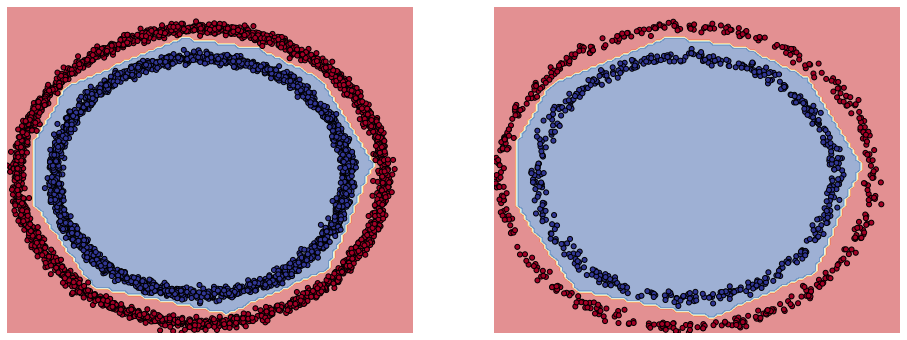

In [44]:
plt.figure(figsize=(16,6))
plt.subplot(121);plot_decision_boundary(model_7, X_train, y_train);plt.axis(False);
plt.subplot(122);plot_decision_boundary(model_7, X_test, y_test);plt.axis(False);

Như vậy, chỉ cần một số thay đổi trong `activation function`, chúng ta đã tạo ra được mô hình dự đoán cực kỳ chính xác

### Vẽ loss curves

Từ đồ thị trên chúng ta có thể thấy kết quả đầu ra của mô hình của là rất tốt. Nhưng đó là khi mô hình đã train xong, làm sao để có thể đánh giá được độ chính xác, sai sót, cũng như hiệu suất của quá trình train qua từng giai đoạn (epoch)? 

Để tìm ra được điều này, chúng ta có thể kiểm tra `loss curves` (cũng được biết đến như `learning curve`)
Ở những module trước, có thể bạn đã từng thấy biến `history` khi gọi phương thức `fitting` cho mô hình ( `fit()` trả về  `history`). Đây là nơi chúng ta sẽ lấy thông tin về cách mô hình hoạt động như thế nào.

Xét `module_7`, đặt biến `history_7` khi gọi phương thức `fit` cho mô hình này.


In [45]:
pd.DataFrame(history_7.history)

,loss,accuracy
0,0.679878,0.54775
1,0.571386,0.73200
2,0.189055,0.99625
3,0.049413,0.99975
4,0.023290,0.99975
5,0.014468,1.00000
6,0.009752,0.99975
7,0.007309,1.00000
8,0.005826,0.99975
9,0.005151,1.00000


Từ bảng trên chúng ta có thể thấy giá trị `loss` giảm xuống và `accuracy` tăng lên. Nhưng ta nên biểu diễn chúng dưới dạng đồ thị

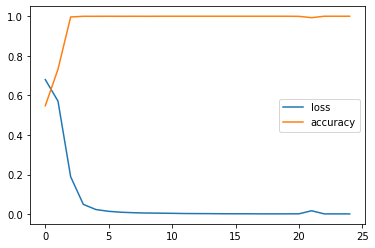

In [46]:
pd.DataFrame(history_7.history).plot()

> **🔑 Lưu ý:** Khi quan sát đồ thị, loss giảm, accuracy tăng chứng tỏ mô hình đang cải thiện dần dần. Điều này cũng đồng nghĩa giá trị dự đoán sẽ gần hơn với giá trị thực tế.

### Tìm kiếm learning rate tốt nhất

Ngoài các kiến trúc được xây dựng cố định trong mô hình ( như layers, số neurons, activations...) thì hyperparameter quan trọng nhất mà chúng ta có thể thay đổi được trong neural network là `learning rate`.

Trong`model_7`, bạn đã thấy `learning_rate` được điều chỉnh ngoài giá trị mặc định (0.001). Lúc đó, có thể bạn sẽ tự hỏi tại sao lại có con số này? Trả lời cho câu hỏi đó là con số ngẫu nhiên từ việc đoán mò mà ra 😎. Tuy nhiên, trong mục này, chúng ta sẽ tìm kiếm **learning rate** tốt nhất thực sự. Nhưng dù nó là tốt nhất thì cũng không có nghĩa làm bạn hài lòng nhất với kết quả cuối cùng. Do đó, điều quan trọng đó là sự trải nghiệm của bản thân với mô hình, bạn nên xây dựng nó, đánh giá nó, rồi cứ lặp đi lặp lại cho đến khi hài lòng.

Để tìm learning rate tốt nhất, ta sẽ sử dụng callback function là : [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).


### model_8 (xây dựng mô hình và sử dụng learning rate callback function để tìm kiếm learning rate tốt nhất)

In [47]:
tf.random.set_seed(42)

model_8 = Sequential()
model_8.add(Dense(5, activation="relu"))
model_8.add(Dense(5, activation="relu"))
model_8.add(Dense(1, activation="sigmoid"))

model_8.compile(
    loss="binary_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20)) # Learning rate bắt đầu từ 0.001, Cứ qua mỗi epoch learning rate sẽ tăng dần theo 10^(ep /20)

history_8 = model_8.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler],
                        verbose=0
                       )


Sau khi mô hình train xong, các giá trị **learning rate callback** sẽ được lưu lại trong `history_8`. Nhưng vì history lưu các giá trị của `accuracy` và `loss`, vì vậy sử dụng pandas để mở bảng `history_8`

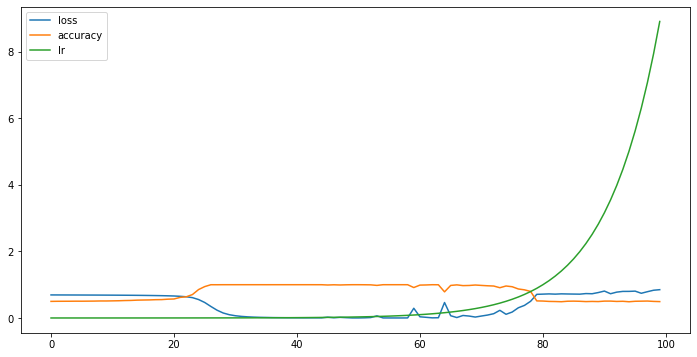

In [48]:
pd.DataFrame(history_8.history).plot(figsize=(12,6))

Qua biểu đồ có thể thấy tỉ lệ learning rate tăng theo theo hàm mũ khi số epoch tăng. Ở một số điểm cụ thể , độ chính xác của mô hình tăng ( sai sót giảm ) thì learning rate sẽ tăng chậm.
Để tìm ra những điểm này ở đâu, chúng ta có thể vẽ biểu đồ loss so với log-scale của learning rate


Text(0, 0.5, 'loss')

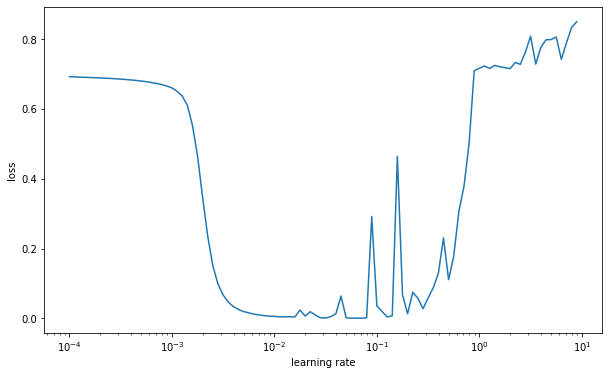

In [49]:
lrs = 1e-4 * (10**(np.arange(0,100,1) / 20))
plt.figure(figsize=(10,6))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")

Trong trường hợp này, có thể thấy learning rate tốt nhất khi loss thấp nhất là 0.02 ($2*10^{-2}$).

Bây giờ chúng ta sẽ thử xây dựng mô hình khác với `learning_rate` là 0.02

### model_9 ( xây dựng mô hình với learning rate tốt nhất)

In [50]:
tf.random.set_seed(42)

model_9 = Sequential()
model_9.add(Dense(5,activation="relu"))
model_9.add(Dense(5,activation="relu"))
model_9.add(Dense(1,activation="sigmoid"))

model_9.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

history_9 = model_9.fit(
    X_train, 
    y_train, 
    epochs=20,
    verbose=0
)

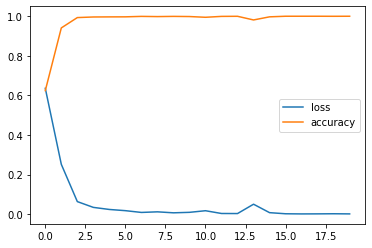

In [51]:
pd.DataFrame(history_9.history).plot()

So sánh giữa `model_7` và `model_9`

Text(0.5, 1.0, 'history 9')

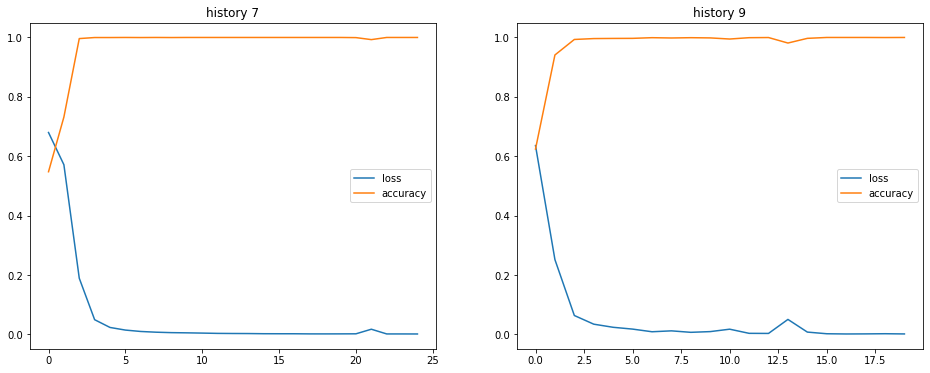

In [52]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
pd.DataFrame(history_7.history).plot(ax=ax1)
ax1.set_title("history 7")
pd.DataFrame(history_9.history).plot(ax=ax2)
ax2.set_title("history 9")

Có thể thấy với learning rate cao ở `model_9` cao hơn `model_7` thì `model_9` đạt độ chính xác cao hơn dù với epoch ít hơn.

Dự đoán giá trị với `model_9` : 

Đang làm việc với mô hình phân loại 2 lớp
Đang làm việc với mô hình phân loại 2 lớp


Text(0.5, 1.0, 'Test')

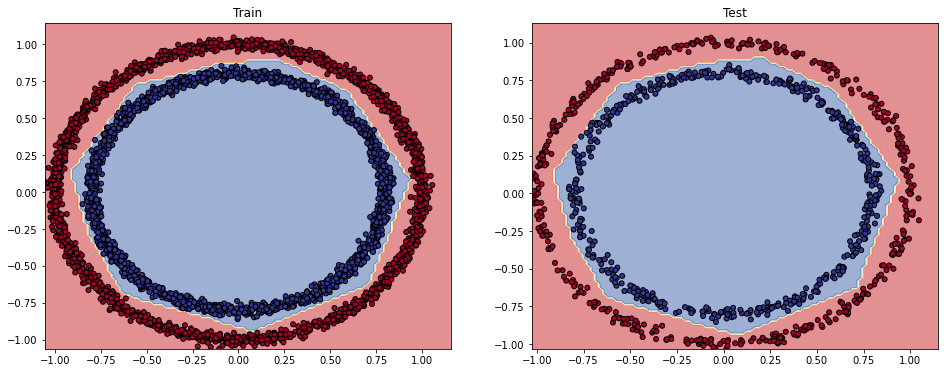

In [53]:
plt.figure(figsize=(16,6))
plt.subplot(121);plot_decision_boundary(model_9,X_train, y_train);plt.title("Train")
plt.subplot(122);plot_decision_boundary(model_9,X_test, y_test);plt.title("Test")

Như đã thấy, mô hình hoạt động gần như là hoàn hảo

Đây là những loại thử nghiệm bạn sẽ chạy thường xuyên phải làm khi xây dựng mô hình nào đó.

Bắt đầu với các giá trị mặc định và xem chúng hoạt động như thế nào trên dữ liệu của bạn. Nếu chúng làm chưa tốt, hãy tiến hành cải thiện mô hình bằng các phương pháp ở trên.

Đó là những gì cơ bản của mô hình 2 lớp binary class. Hẹn gặp lại các bạn trong phần multi-class classification




### Phương pháp đánh giá mô hình phân loại

Bên cạnh việc quan sát trực quan mô hình phân tích dữ liệu bằng biểu đồ, chúng ta còn có thể thiết lập đánh giá tổng quan cho mô hình bằng các phương pháp toán học khác trong mô hình **phân loại**

| Phương pháp đánh giá | Định nghĩa | Code | 
| -------------------- | ---------- | ---- | 
| Accuracy | Số mẫu chính xác trong tổng số mẫu được dự đoán. VD : có 95 mẫu chính xác trong số 100 mẫu thì độ chính xác là 95% | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) | 
| Precision | Tỉ lệ true positives trong tổng số mẫu. Precision càng cao thì tỉ lệ dương sai càng thấp ( mô hình dự đoán 1 nhưng thực tế là 0) | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) | 
| Recall | Tỉ lệ dương đúng trong tổng số mẫu từ true positives và false negatives (mô hình dự đoán 0 nhưng giá trị thực tế là 1 ) | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) | 
| F1-score | Là sự kết hợp giữa precision và recall thành một không gian đo. 1 là tốt nhất, 0 là tệ nhất | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | So sánh giá trị dự đoán với giá trị thực, tỉ lệ càng cao thì độ chính xác càng cao. Tất cả các giá trị sẽ tạo thành ma trận thể hiện sự tương quan với nhau | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) | 
| Classification report | Tập hợp các phương pháp đo lường như `precision`, `recall`, `f1-score` | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) | 

> **🔑 Lưu ý:** Mỗi phương pháp đánh giá có ý nghĩa riêng tùy thuộc vào từng mô hình phân loại nhất định. Do đó, không có phương pháp nào là tuyệt đối cả.

![anatomy of confusion matrix](https://miro.medium.com/max/974/1*H_XIN0mknyo0Maw4pKdQhw.png)

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
y_preds_probs = model_9.predict(X_test)
y_preds_probs[:5]

array([[5.6569265e-09],
       [9.9996746e-01],
       [4.6477246e-07],
       [6.3397703e-05],
       [9.8405115e-05]], dtype=float32)

In [56]:
y_pred_labels = np.round(y_preds_probs)
y_pred_labels[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [57]:
confusion_matrix(y_test, y_pred_labels)

array([[475,   0],
       [  0, 525]])

Từ ma trận trên có thể thấy các con số đều nằm trên trục đường chéo, nhưng ma trận trên chỉ biểu diễn những con số, nó không thể hiện rõ ý nghĩa cho người đọc nên chúng ta sẽ vẽ biểu đồ thể hiện sự trực quan cho những số liệu này.

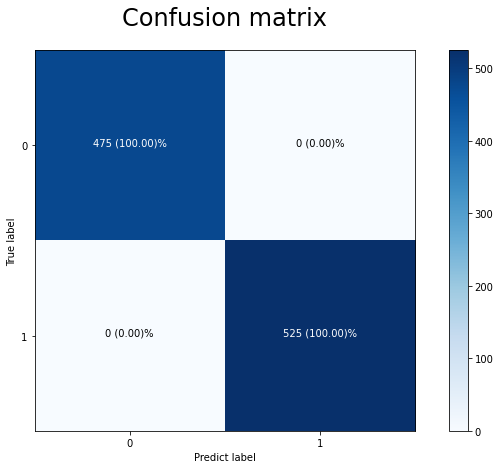

In [58]:
import itertools

def plot_confusion_matrix(y_true, y_preds, class_names=None) : 
    cm = confusion_matrix(y_true,y_preds)
    cm_norm = cm / np.sum(cm, axis=0).astype(np.float32)
    n_classes = cm.shape[0]
    fig,ax = plt.subplots(figsize=(12,7))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    if class_names : 
        labels = class_names 
    else : 
        labels = np.arange(cm.shape[0])
    
    ax.set(title="Confusion matrix",
          xlabel="Predict label",
          ylabel="True label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.set_ticks_position("bottom")
    ax.title.set_size(24)
    
    threshold =( np.max(cm) + np.min(cm) )/ 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.2f})%", horizontalalignment="center", color="black" if threshold > cm[i,j] else "white")

plot_confusion_matrix(y_test, y_pred_labels)

## 7. Thử nghiệm với tập dữ liệu lớn hơn (Fashiong MNIST)

Trong phần trước, chúng ta đã xây dựng mô hình phân loại 2 class (binary class). Khả năng dự đoán dữ liệu điểm là màu đỏ hoặc màu xanh của mô hình là cực kỳ xuất sắc. Nhưng nếu có nhiều class khác nhau thì liệu khả năng dự đoán của mô hình có tốt như vậy không? Phần này sẽ trả lời cho câu hỏi này. 

Giả sử, bạn có một công ty chuyên cung cấp các loại quần áo thời trang đang là xu hướng trên thế giới. Mỗi lần nhập hàng về là một số lượng khổng lồ  với nhiều loại hàng và mẫu mã khác nhau trong khi số lượng nhân viên của bạn lại có hạn. Chính vì thế để tối ưu quá trình phân loại hàng hóa, bạn quyết định tìm đến công cụ xử lý quá trình phân loại này. Do đó, bạn đã xây dựng mô hình deep learning neural network để dự đoán liệu món đồ đó là quần, áo, nón, hay giày dép...

Khi phân loại có nhiều hơn 2 đối tượng (class), thì được gọi là phân loại nhiều đối tượng (multiclass classification)

Để xây dựng mô hình phân loại nhiều đối tượng, nó cũng được áp dụng tượng tự như xây dựng mô hình Binary class và có một chút thay đổi trong đó. Bạn có thể tham khảo lai bảng phương pháp sau : 


|Hyperparameter | Phân loại 2 class (binary class) | Phân loại nhiều class (multi-class)|
|---------------|----------------------------------|------------------------------------|
|Input layer shape| Có cùng số biến giải thích (VD : Dự đoán bệnh nhân có bị tim mạch hay không dựa trên 5 đặc tính `độ tuổi`, `giới tính`, `chiều cao`, `cân nặng`, `môi trường sống`) | Giống với binary class |
|Hidden layers | Điều chỉnh tùy thuộc vào vấn đề, min=1, max= vô hạn|  Giống với binary class | 
|Neurons trên hidden layer| Điều chỉnh tùy thuôc vào vấn đề, Thường từ 10 đến 100 | Giống với binary class |
|Output layer shape| 1 ( vì chỉ có 2 class nên chỉ có thể là class này hoặc class kia) | Dựa vào số class (VD : 3 cho `food`, `dog`, `photo`)
|Hidden activation| Thường là [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Giống với binary class |
|Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
|Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) trong TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) trong TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Giống với binary class |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*


Để bắt đầu, chúng ta sẽ cần load dữ liệu có sẵn [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist) trong thư viện `Tensorflow`

In [59]:
# Import các thư viện 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Khám phá tập dữ liệu và labels

In [60]:
(train_data, train_labels), (test_data,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Kiểm tra thông tin mẫu dữ liệu train đầu tiên:

In [61]:
print(f"Mẫu dữ liệu train: {train_data[0][10:15]}")
print(f"Hình thái mẫu dữ liệu train: {train_data[0].shape}")
print(f"Label của mẫu dữ liệu train: {train_labels[0]}")

Mẫu dữ liệu train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0 193 228 218 213 198
  180 212 210 211 213 223 220 243 202   0]
 [  0   0   0   0   0   0   0   0   0   1   3   0  12 219 220 212 218 192
  169 227 208 218 224 212 226 197 209  52]
 [  0   0   0   0   0   0   0   0   0   0   6   0  99 244 222 220 218 203
  198 221 215 213 222 220 245 119 167  56]
 [  0   0   0   0   0   0   0   0   0   4   0   0  55 236 228 230 228 240
  232 213 218 223 234 217 217 209  92   0]
 [  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
  222 221 216 223 229 215 218 255  77   0]]
Hình thái mẫu dữ liệu train: (28, 28)
Label của mẫu dữ liệu train: 9


Kích thước toàn bộ dữ liệu của train và test : 

In [62]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Thông tin về labels : 

In [63]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Có 10 classes cho tập dữ liệu này (danh sách từ 0-9, mỗi phần tử đại diện cho 1 class).

| Label | Description |
|----- | ------------|
| 0 |	T-shirt/top |
| 1	| Trouser |
| 2	| Pullover |
| 3	| Dress |
| 4	| Coat |
| 5	| Sandal |
| 6	| Shirt |
| 7	| Sneaker | 
| 8	| Bag |
| 9	| Ankle boot |

In [64]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
num_classes = len(class_names)
class_names,num_classes

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

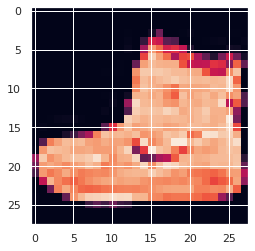

In [65]:
plt.imshow(train_data[0])

Tạo hàm hiển thị hình ảnh ngẫu nhiên kèm theo label : 

In [66]:
import random
import math
def plot_random_images(n_samples=1): 
    random_choices = random.sample(range(len(train_data)), k=n_samples)
    n_cols = 3 
    n_rows = math.ceil(n_samples / n_cols)    
    plt.figure(figsize=(n_rows*6, 12))
    for i, image_index in enumerate(random_choices) :         
        target_image = train_data[image_index] 
        target_class = train_labels[image_index]
        target_class_name = class_names[target_class]
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(target_image,cmap=plt.cm.viridis)
        plt.title(target_class_name)
        plt.axis(False)

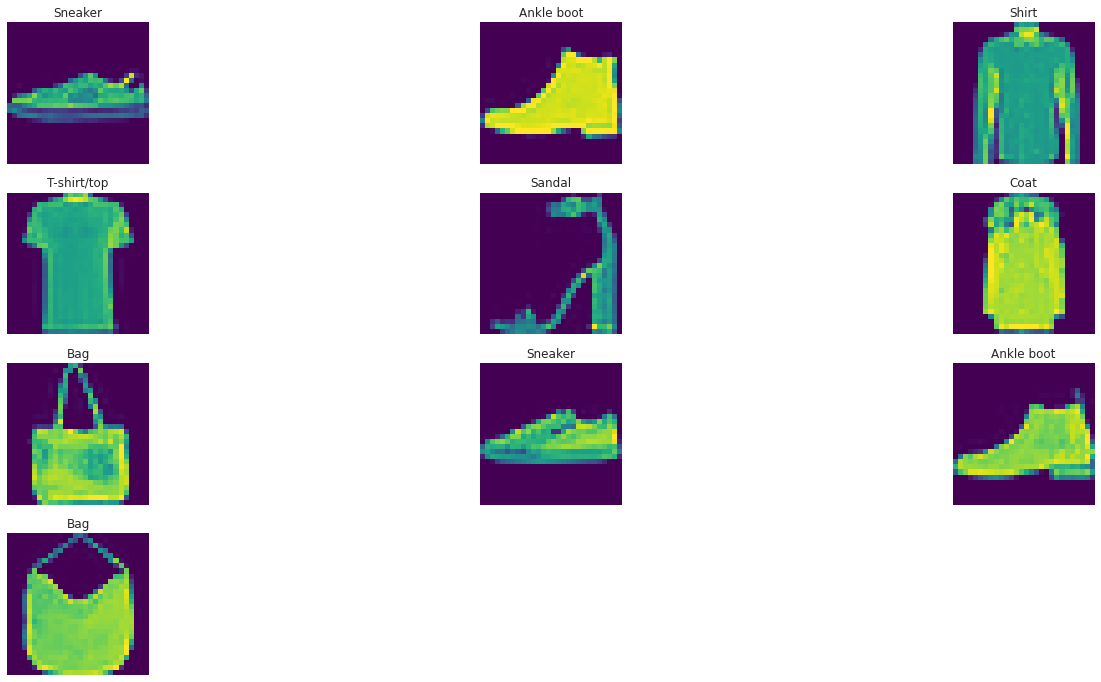

In [67]:
plot_random_images(10)

Trước khi xây dựng mô hình phân loại, dữ liệu mà chúng ta có được là những dữ liệu hình ảnh. Do đó, việc tìm kiếm các mối liên hệ từ các ma trận tạo thành các hình ảnh sẽ giúp mô hình dự đoán đưa đến kết luận liệu với dữ liệu đó thì hình ảnh được cho sẽ thuộc label nào.

Vì đây là dữ liệu multiclass classification, có một số kiến trúc trong mô hình cần lưu ý : 
+ **input shape** : với dữ liệu này là 28x28 tensors(tương ứng với chiều cao và chiều rộng của hình)
    - Với kích thước trên chúng ta sẽ duỗi chúng thành một vector với kích thước 784
+ **output shape** : Giá trị xuất ra của mô hình sẽ là một mảng gồm 10 phần tử tương ứng với 10 class và tổng của chúng sẽ là `1` (mỗi phần tử là khả năng (xác suất) xảy ra một class nào đó, xác suất càng cao thì khả năng xảy ra class đó càng lớn)
    - Activation : Thay vì dùng `sigmoid` như mô hình phân loại 2 class, thì với nhiều class sẽ là `softmax`.
+ Thay đổi `loss function` khi compile mô hình từ mô hình 2 class sang nhiều class : 
    - Lưu ý :
        + Nếu để labels từ 0-9 thì loss function phải  là : [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) 
        + Nếu one-hot labels ( tức là tạo cho label thành một mảng gồm 10 phần tử, VD label là 2 thì sẽ có mảng sau : [0,0,1,0,0,0,0,0,0,0]) thì sử dụng : [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy). 
+ Chúng ta sẽ sử dụng `validation_data` khi gọi hàm `fit()` cho mô hình. Điều này cho chúng ta theo dõi được quá trình mô hình hoạt động trong cả train và test        

### Train mô hình chưa được chuẩn hóa (non-normolized)

In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

Mô hình dưới đây label không được `one-hot` nên sử dụng [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy).Trước khi chạy mô hình, cần chuyển kiểu dữ liệu của label thành `float32`, nếu không có thể bạn sẽ bị báo lỗi 

In [69]:
train_labels = np.float32(train_labels)
test_labels = np.float32(test_labels)

train_labels

array([9., 0., 0., ..., 3., 0., 5.], dtype=float32)

In [70]:
tf.random.set_seed(42)

model_10 = Sequential([
    Flatten(input_shape=(28,28)), 
    Dense(4,activation="relu"),
    Dense(4,activation="relu"),
    Dense(num_classes,activation="softmax")
])

model_10.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)

model_10_history = model_10.fit(
    train_data,
    train_labels,
    epochs=10,
    verbose=2,
    validation_data=(test_data, test_labels)
)



Epoch 1/10
1875/1875 - 4s - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/10
1875/1875 - 4s - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/10
1875/1875 - 3s - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/10
1875/1875 - 4s - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/10
1875/1875 - 4s - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/10
1875/1875 - 4s - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/10
1875/1875 - 3s - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_accuracy: 0.3289
Epoch 8/10
1875/1875 - 4s - loss: 1.5784 - accuracy: 0.3148 - val_loss: 1.5766 - val_accuracy: 0.3262
Epoch 9/10
1875/1875 - 4s - loss: 1.5713 - accuracy: 0.3250 - val_loss: 1.5652 - val_accuracy: 0.3138
Epoch 10/10
1875/1875 - 4s - loss: 1.5689 - accuracy: 0.3201 - val_loss: 1.5680 - 

In [71]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_10.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.5680 - accuracy: 0.3045


[1.5680228471755981, 0.304500013589859]

Tạo hàm vẽ biểu đồ  mô tả quá trình mô hình train dữ liệu qua từng epochs

In [73]:
def plot_loss_curves(history) : 
    history = history.history
    acc, loss = history["accuracy"], history["loss"]
    val_acc, val_loss = history["val_accuracy"], history["val_loss"]
    
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    plt.plot(acc, label="train accuracy")
    plt.plot(val_acc, label="val accuracy")
    plt.xlabel("epochs")
    plt.ylabel("percentage")
    plt.legend()
    
    plt.subplot(122)
    plt.plot(loss, label="train loss")
    plt.plot(val_loss, label="val loss")
    plt.xlabel("epochs")
    plt.ylabel("percentage")
    plt.legend()


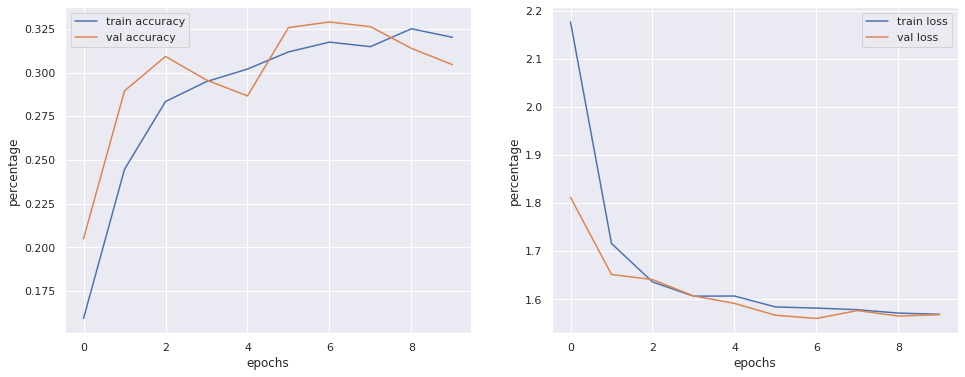

In [74]:
plot_loss_curves(model_10_history)

Mô hình có độ chính xác tương đối thấp (~35%) sau 10 epochs khi sử dụng mô hình tương tự với binary class ở phần trước. 

Liệu bạn có còn nhớ trước đây chúng ta đã từng nói về chuẩn hóa dữ liệu trong neural network (đưa dữ liệu về 0 - 1)? 

`model_10` chưa chuẩn hóa các dữ liệu trong ma trận,do đó, các giá trị pixel dao động từ 0 - 255. Trước khi gọi hàm `fit`, các dữ liệu cần được chuẩn hóa. 

### Train mô hình với dữ liệu được chuẩn hóa (normolized data)

In [75]:
# Phạm vi các trị train data, test data khi chưa chuẩn hóa
(train_data.min(), train_data.max()), (test_data.min(), test_data.max())

((0, 255), (0, 255))

In [76]:
# Phạm vi các giá trị sau khi chuẩn hóa
train_data_scaled = train_data / 255. #(`255.` chia lấy kiểu float)
test_data_scaled = test_data / 255.

train_data_scaled.min(),train_data_scaled.max()

(0.0, 1.0)

OK, các giá trị đã được đưa về 0-1. Bây giờ ta sẽ chạy lại mô hình trên, chúng ta không cần phải khởi tạo mô hình bằng hàm `Sequential`, chỉ cần `compile` và `fit` là được.

In [77]:
model_10.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)

model_10_normed_history = model_10.fit(
    train_data_scaled,
    train_labels,
    epochs=10, 
    validation_data=(test_data_scaled,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6361 - accuracy: 0.3201 - val_loss: 1.4551 - val_accuracy: 0.3628
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4170 - accuracy: 0.3830 - val_loss: 1.3824 - val_accuracy: 0.4017
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3564 - accuracy: 0.4137 - val_loss: 1.3377 - val_accuracy: 0.4314
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3235 - accuracy: 0.4340 - val_loss: 1.3094 - val_accuracy: 0.4495
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3063 - accuracy: 0.4490 - val_loss: 1.3095 - val_accuracy: 0.4588
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2897 - accuracy: 0.4682 - val_loss: 1.2727 - val_accuracy: 0.4840
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2473 - accuracy: 0.4937 - val_loss: 1.2064 - val_accuracy:

Cũng là `model_10` trước khi scaled dữ liệu, với 10 epochs, độ chính xác chỉ khoảng ~37%, còn bây giờ nó đã lên đến ~51%. Một sự cải thiện độ chính xác đáng kể  khi chỉ cần scaled dữ liệu.
Theo dõi quá trình cải thiện của mô hình qua từng epochs:

In [78]:
pd.DataFrame(model_10_normed_history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.636052,0.320100,1.455113,0.3628
1,1.417037,0.383033,1.382420,0.4017
2,1.356395,0.413683,1.337729,0.4314
3,1.323488,0.434050,1.309410,0.4495
4,1.306254,0.448967,1.309463,0.4588
5,1.289672,0.468233,1.272732,0.4840
6,1.247299,0.493700,1.206420,0.5181
7,1.196021,0.514300,1.177217,0.5257
8,1.175470,0.519900,1.176230,0.5259
9,1.165621,0.523217,1.190536,0.5104


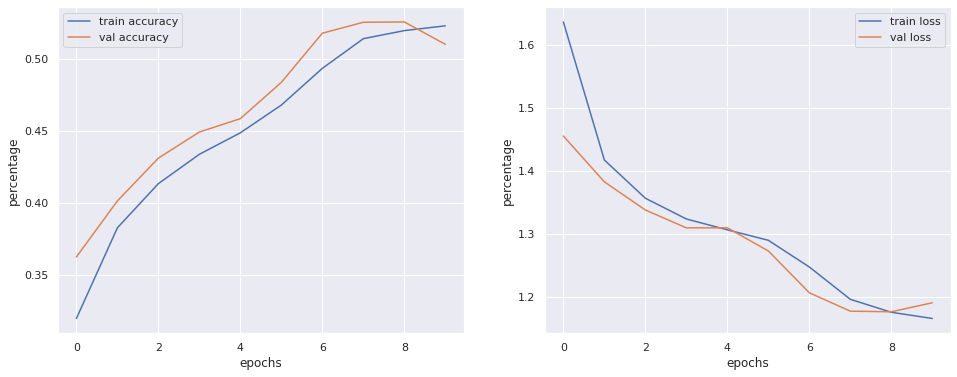

In [79]:
plot_loss_curves(model_10_normed_history)

So sánh giữa mô hình có dữ liệu bình thường và mô hình có dữ liệu được scaled. 

Text(0.5, 0.98, 'Compare the performance between non normalized data and normolized data in the same model')

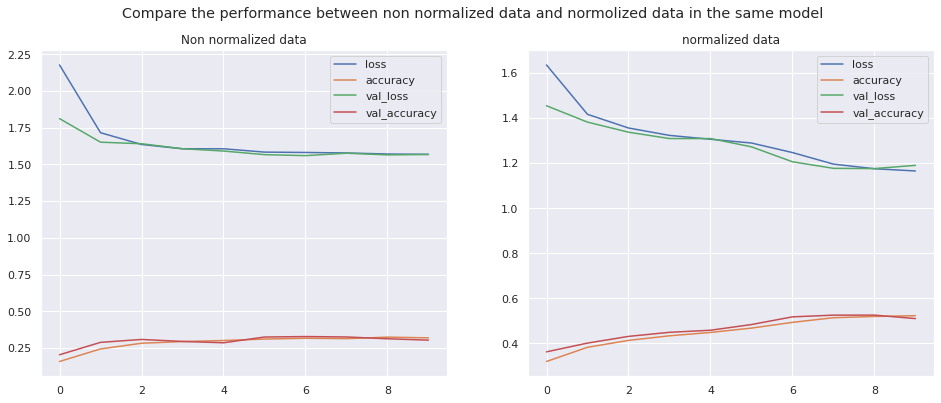

In [80]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(121)
pd.DataFrame(model_10_history.history).plot(ax=ax1)
ax1.set_title("Non normalized data")
ax2 = plt.subplot(122)
pd.DataFrame(model_10_normed_history.history).plot(ax=ax2)
ax2.set_title("normalized data")
plt.suptitle("Compare the performance between non normalized data and normolized data in the same model")

Từ 2 biểu đồ trên, có thể thấy được mô hình được chuẩn hóa (scaled) dữ liệu cải thiện độ chính xác và giảm độ sai sót đi rất nhiều so với mô hình không được chuẩn hóa. 

Vậy còn `learning_rate`, chúng ta sẽ tìm learning_rate tốt cho mô hình

In [81]:
tf.random.set_seed(42)

# Trước hết chúng ta sẽ copy lại mô hình model_11
model_11 = tf.keras.models.clone_model(model_10)
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


trước khi `compile` và `fit`, ta sẽ tạo một callback function ghi lại `learning_rate` của mô hình qua từng epoch và sẽ thực hiện train mô hình với 100 epochs

In [82]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch / 20),verbose=0)

model_11.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_11_normed_history = model_11.fit(
    train_data_scaled,
    train_labels,
    epochs=100, 
    verbose=0,
    validation_data=(test_data_scaled,test_labels),
    callbacks=[
        lr_scheduler
    ]
)

Biểu diễn đồ thị thể hiện mối liên hệ giữa `val_loss` và `learning rate`

Text(0.5, 1.0, 'Finding the ideal learning rate')

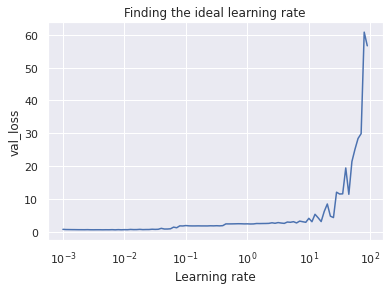

In [83]:
lrs = 1e-3 * 10**(np.arange(100) / 20)
plt.semilogx(lrs,model_11_normed_history.history["val_loss"])
plt.xlabel("Learning rate")
plt.ylabel("val_loss")
plt.title("Finding the ideal learning rate")

Từ biểu đồ trên, có thể thấy `val_loss` thấp nhất nằm khi `learning rate` đạt giá trị $10^{-2}$. Nhưng trước hết, có thể thấy với số epochs 100, mô hình có vẻ như hoạt động không tốt, nên cần rút gọn số epochs lại. Bây giờ, thử fit lại mô hình với `leanrning_rate` là $10^{-2}$ với epochs là 50

In [84]:
tf.random.set_seed(42)

model_12 = tf.keras.models.clone_model(model_11)

model_12.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

model_12_normed_history = model_12.fit(
    train_data_scaled,
    train_labels,
    epochs=50,
    validation_data=(test_data_scaled,test_labels)
)

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0991 - accuracy: 0.5714 - val_loss: 0.9693 - val_accuracy: 0.6478
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8667 - accuracy: 0.6924 - val_loss: 0.8411 - val_accuracy: 0.7120
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8373 - accuracy: 0.7011 - val_loss: 0.8128 - val_accuracy: 0.7123
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8262 - accuracy: 0.7057 - val_loss: 0.8263 - val_accuracy: 0.7044
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8204 - accuracy: 0.7060 - val_loss: 0.9406 - val_accuracy: 0.6550
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8149 - accuracy: 0.7087 - val_loss: 0.8014 - val_accuracy: 0.7127
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8044 - accuracy: 0.7096 - val_loss: 0.9450 - val_accuracy:

Mô hình đã được train với `learning_rate` tốt, độ chính xác 70-74%. Với độ chính xác này, mô hình dự báo cũng khá ổn, nhưng mô hình này mới chỉ là mô hình cơ bản, có thể nó sẽ còn tốt hơn rất nhiều nếu nó được cải thiện. 

### Cải thiện mô hình 

Có thể cải thiện mô hình bằng một số cách sau : 
- Train mô hình lâu hơn ( không khả thi vì mô hình trước 100 epochs tỏ ra rất kém) ❌ 
- Tăng số lượng dữ liệu train (Dữ liệu không thể thêm trong trường hợp này ) ❌ 
- Tăng số  hidden layers trong mô hình ✅
- Tăng số unit (neurons) trong mỗi layer ✅
- Sử dụng transfer learning (Phần sau sẽ giới thiệu)

Ta sẽ tăng số hidden layers cùng với tăng số lượng unit trong mỗi layer

In [85]:
tf.random.set_seed(42)

model_13 = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(128, activation="relu"),                       
  Dense(128, activation="relu"),
  Dense(128, activation="relu"),
  Dense(num_classes, activation="softmax"),
])

model_13.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

model_13_normed_history = model_13.fit(
    train_data_scaled,
    train_labels,
    epochs=10, 
    validation_data=(test_data_scaled,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5755 - accuracy: 0.7956 - val_loss: 0.5782 - val_accuracy: 0.8067
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4735 - accuracy: 0.8370 - val_loss: 0.5257 - val_accuracy: 0.8145
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4499 - accuracy: 0.8418 - val_loss: 0.4867 - val_accuracy: 0.8331
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4342 - accuracy: 0.8485 - val_loss: 0.4865 - val_accuracy: 0.8309
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4237 - accuracy: 0.8526 - val_loss: 0.4761 - val_accuracy: 0.8401
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4178 - accuracy: 0.8546 - val_loss: 0.5059 - val_accuracy: 0.8115
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4182 - accuracy: 0.8542 - val_loss: 0.4618 - val_accuracy:

Mô hình đã tăng tỉ lệ chính xác lên rất nhiều sau khi cải thiện mô hình.



### Đánh giá mô hình được cải thiện

In [86]:
model_13.evaluate(test_data_scaled, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4390 - accuracy: 0.8456


[0.43895140290260315, 0.8456000089645386]

Nhìn chung, mô hình có khả năng dự đoán chính xác lên đến 83% trong tổng số mẫu. Vậy độ chính xác cụ thể từng loại class của tập dữ liệu này là bao nhiêu?

- Đầu tiên sẽ cho mô hình dữ đoán dữ liệu test 
- So sánh kết quả dự đoán với test_label để đánh giá độ chính xac

Để làm được điều này, trước tiên ta sẽ dự đoán mô hình rồi sau đó sẽ tạo hàm thể hiện độ chính xác của ma trận `confusion_matrix`

In [87]:
y_pred_probs = model_13.predict(test_data_scaled)
y_preds_probs.shape 

(1000, 1)

Giá trị dự đoán gồm có 10000 tương ứng với 10000 mẫu từ tập dữ liệu test. Trong mỗi 10000 mẫu đó là một mảng gồm 10 phần tử đại diện cho 10 class thể hiện xác suất lựa chọn cho class đó. Vậy với xác suất nào lớn nhất, ta sẽ lựa chọn vị trí đó đại diện cho label dự đoán đó. VD : `[0.1, 0.5,0.05,0.05,0.05,0.05, 0.05,0.05,0.05,0.05]` với 0.5 là lớn nhất nên dự đoán class `1` là label cho mẫu này.

In [88]:
y_pred_labels = np.argmax(y_pred_probs,axis=1)
y_pred_labels

array([9, 2, 1, ..., 8, 1, 5])

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


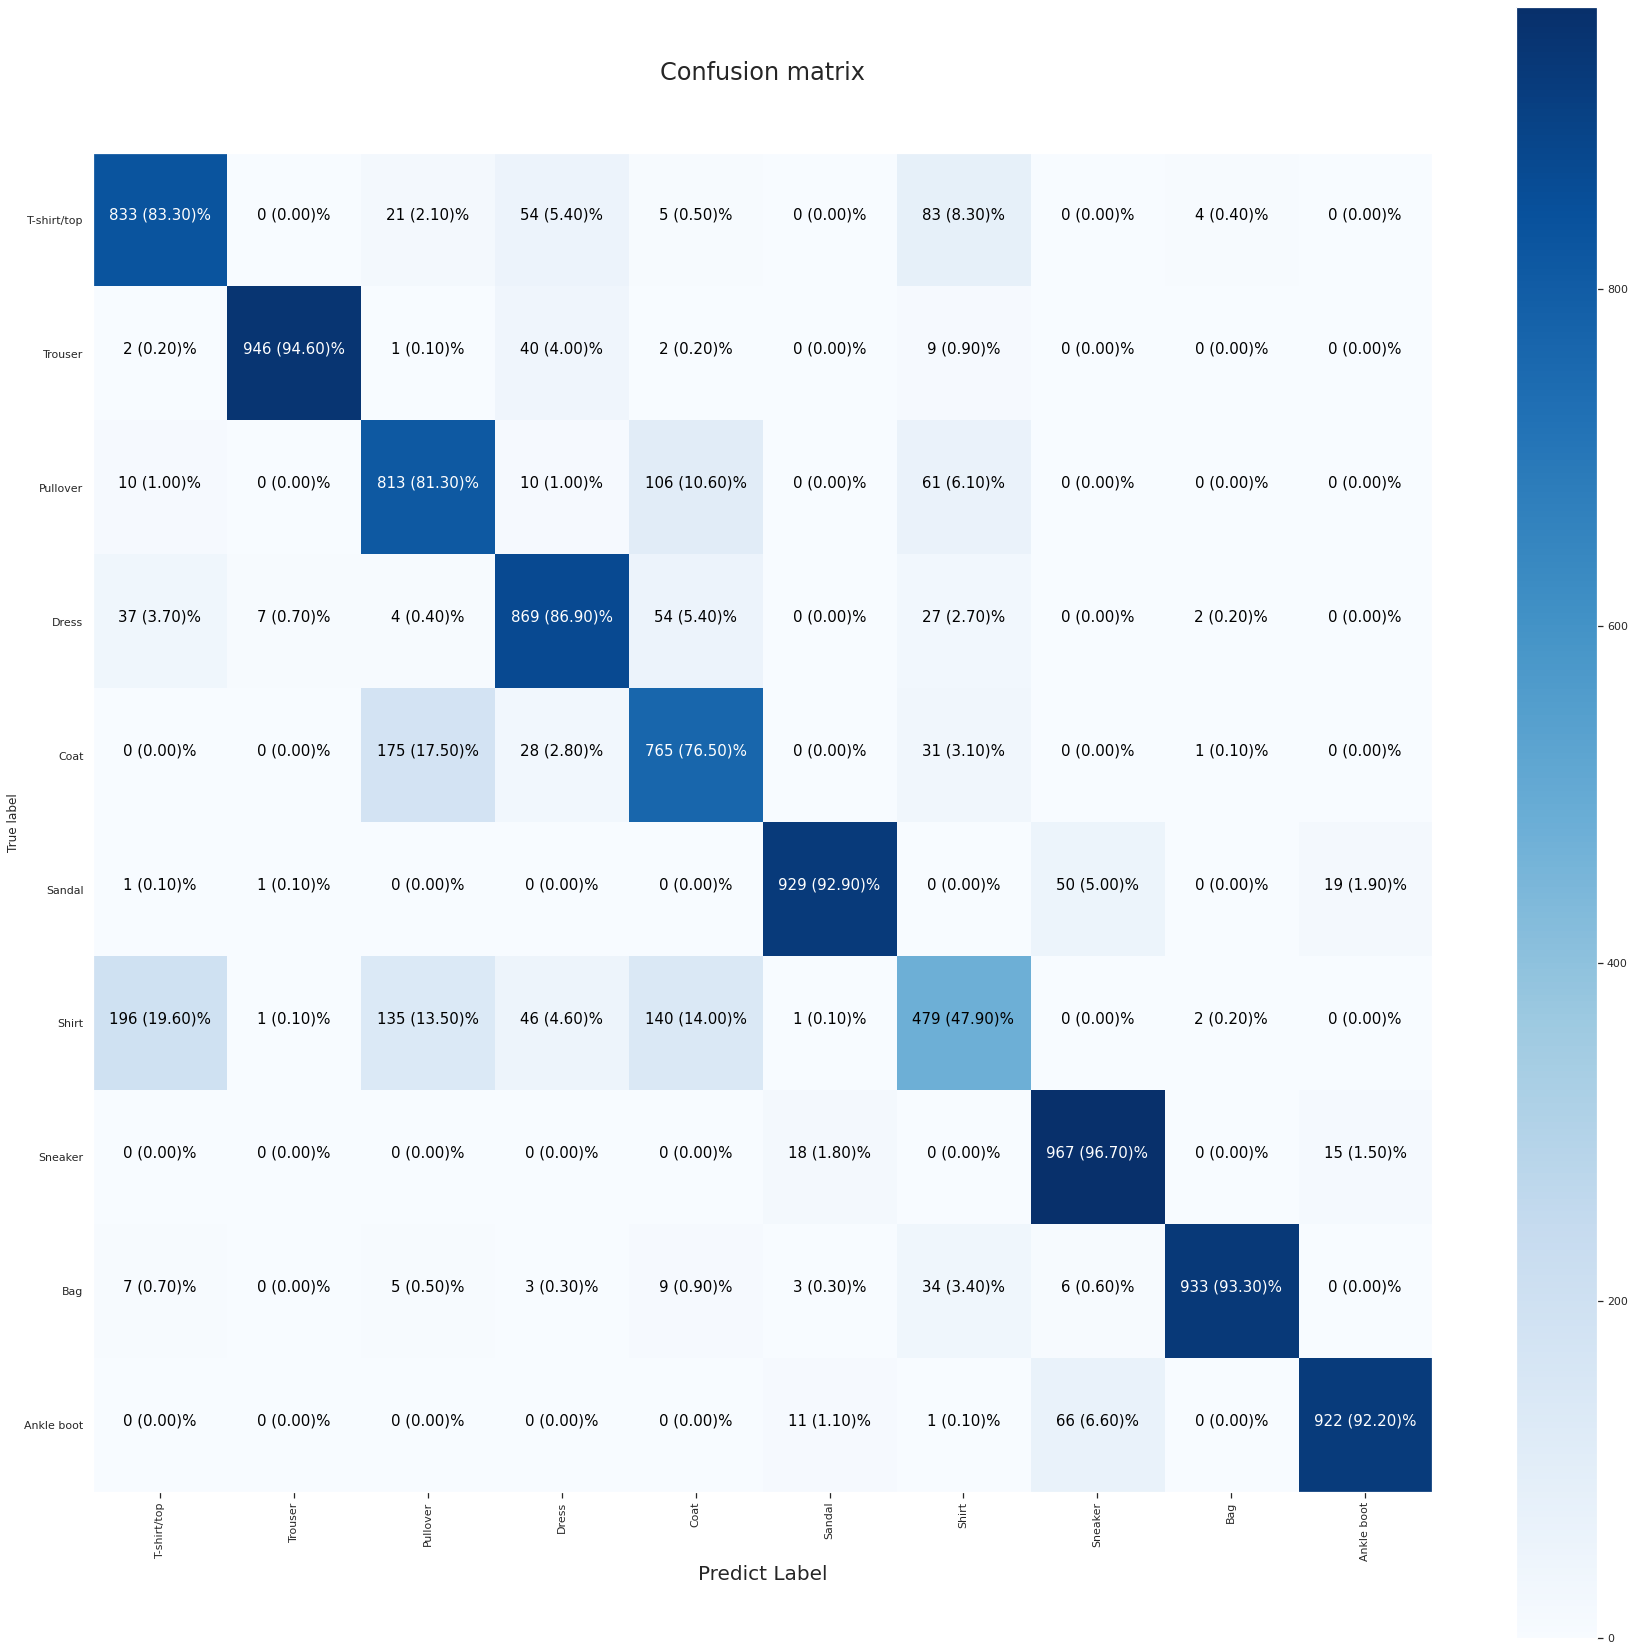

In [90]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true, y_preds, class_names=None) : 
  cm = confusion_matrix(y_true, y_preds) 
  cm_normed = cm / np.sum(cm,axis=1).astype(np.float32)
  
  if class_names and cm.shape[0] != len(class_names) : 
    print("the length of class_names is not valid")
  
  if class_names : 
    labels = class_names 
  else : 
    labels = range(cm.shape[0])

  fig, ax = plt.subplots(figsize=(3*cm.shape[0],3*cm.shape[1]))
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  print(labels)
  ax.set(
      title="Confusion matrix",
      xlabel="Predict Label",
      ylabel="True label",
      xticks=range(cm.shape[0]),
      yticks=range(cm.shape[1]),
      xticklabels=labels,
      yticklabels=labels,
  )
  ax.xaxis.set_ticks_position("bottom")
  ax.title.set_size(24)
  ax.set_xticklabels(labels=labels, rotation=90)
  ax.xaxis.label.set_size(20)
  ax.grid(False)

  threshold = (np.max(cm) + np.min(cm)) / 2
  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) : 
    plt.text(j,
             i,
             f"{cm[i,j]} ({cm_normed[i,j]*100:.2f})%", 
             fontsize=15, 
             horizontalalignment="center",
             color="black" if threshold > cm[i,j] else "white") 
plot_confusion_matrix(test_labels, y_pred_labels, class_names=class_names)


### Dự đoán label

Sau khi đo lường độ chính xác cụ thể trên từng class, chúng ta sẽ tiến hành thử nghiệm với mô hình dự đoán và so sánh với giá trị thực xem kết quả sẽ như thế nào.

Để thử nghiệm, ta sẽ tạo hàm dự đoán hình ảnh ngẫu nhiên trên tập dữ liệu `test`. Hàm này  nhận 3 tham số gồm : 
+ Mô hình dự đoán
+ Tập dữ liệu test (ma trận hình ảnh được được chuẩn hóa)
+ Labels của tập dữ liệu test (để so sánh với giá trị dự đoán)

In [125]:
import random 

def make_predict_and_plot_image(model, image_data,labels) : 
  random_image = random.choice(range(len(image_data)))
  image = image_data[random_image]
  target_class = labels[random_image]
  target_class_name = class_names[int(target_class)]
  
  image_pred_probs = model.predict(tf.expand_dims(image,axis=0))
  image_pred_class= tf.argmax(image_pred_probs,axis=1)
  image_pred_label = class_names[int(image_pred_class)]
  
  color = "red"
  if target_class_name == image_pred_label : 
    color = "green"
  
  plt.figure(figsize=(8,4))
  plt.imshow(image)
  plt.title(f"Actual : {target_class_name}\n Predict: {image_pred_label} with {tf.reduce_max(image_pred_probs[0])*100:.2f}%", color=color)


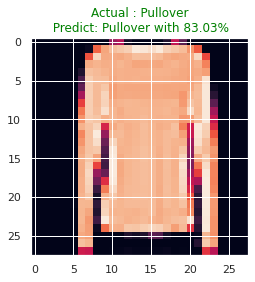

In [127]:
make_predict_and_plot_image(model_13, test_data_scaled,test_labels)

### Mô hình đã học được những đặc tính nào?

Ở những bài viết trước đã có nhiều lần đề cập đến việc tìm các đặc tính (các điểm chung hoặc đặc trưng của các hình ảnh để liên kết giữa chúng với nhau) tiêu biểu trong neural network bằng các con số, nhưng với mô hình này đặc tính trong nó là gì ? 

In [129]:
model_13.layers

In [130]:
model_13.layers[1]

Và chúng ta có thể tìm thấy các đặc tính được học bởi các layer cụ thể bằng phương thức `get_weights()`


In [137]:
weights, bias = model_13.layers[1].get_weights()

weights, bias[:5], weights.shape, bias.shape

(array([[ 2.66954973e-02, -9.56996530e-03,  7.47938275e-01, ...,
         -4.07474041e-02,  1.48007795e-02, -3.90902162e-04],
        [ 6.45309016e-02, -6.13619164e-02,  1.09231544e+00, ...,
          4.91267771e-01,  5.40623888e-02,  4.54814956e-02],
        [ 4.06332910e-02,  4.49500158e-02,  2.56287861e+00, ...,
          4.35182095e-01, -4.74400409e-02, -5.38105518e-03],
        ...,
        [ 7.16553256e-02, -3.15123200e-02,  1.48855698e+00, ...,
          1.52392995e+00,  6.87063709e-02,  3.35246995e-02],
        [ 2.92116031e-02, -6.55823946e-03,  9.96252239e-01, ...,
          1.63837636e+00,  4.45979163e-02,  6.81063607e-02],
        [ 5.24425432e-02, -7.66266957e-02,  7.30403543e-01, ...,
          1.63493883e-02,  4.40619066e-02, -4.64956462e-03]], dtype=float32),
 array([-0.0600384 , -0.06001915,  1.6928424 , -0.09111124, -0.06004031],
       dtype=float32),
 (784, 128),
 (128,))

Có thể thấy ma trận `weights` có kích thước tương tự với dữ liệu được duỗi sau khi nhập vào `784(28 x 28)` và có sự sao chép của các ma trận `weights` với mỗi neuons trong một layer đươc chỉ định (layer được chỉ định có 128 neurons)

Mỗi giá trị trong ma trận `weights` phản ánh cách mà các giá trị cụ thể trong dữ liệu đưa vào ảnh hưởng đến việc quyết định của mô hình

## Kết luận 

Chúng ta đã xây dựng một chuỗi mô hình, nhưng chưa từng đề cập đến những gì xảy ra bên trong quá trình train của mô hình đó là gì. Vậy chính xác mô hình đã học những gì ? 

Mô hình đã học bằng việc cập nhật và cải thiện các đặc tính (các giá trị ma trận `weight` và `bias`) qua mỗi epochs. Nó thực hiện việc cải thiện bằng cách so sánh các điểm đặc trưng mà nó đã được học từ dữ liệu được đưa vào để nó dự đoán label với label thực. 

Nếu các đặc tính (`weight` và `bias`) không đưa đến kết quả như mong muốn như làm giảm loss function (loss càng cao đồng nghĩa dự đoán càng tệ), thì khi đó optimizer sẽ cố gắng đưa mô hình cập nhật trở lại các đặc tính theo cách phù hợp ( sử dụng label thực để tham chiếu). 

Quá trình sử dụng label thực như một phép tham chiếu để cải thiện mô hình dự đoán được gọi là [**backpropagation**](https://en.wikipedia.org/wiki/Backpropagation). 

Có thể hiểu cách khác, dữ liệu và labels được truyền qua mô hình (truyền tới) và mô hình cố gắng tìm ra mối liên hệ giữa dữ liệu với label đó.

Và nếu như mô hình học về mối liên hệ không gần với mối liên hệ thực tế hoặc nó có thể cải thiện thì mô hình đó sẽ thực hiện bằng cách truyền ngược lại và điều chỉnh ma trận `weight` và `bias` để nó thể hiện dữ liệu tốt hơn.
